# Beacon Operation Check-Up
The purpose of this notebook is to check on the beacons and make sure they are operating before sending them out to participants.

In [9]:
import pandas as pd
import numpy as np
import os

# Data Import
Import data for each beacon can concatenate it to one single dataframe.

In [26]:
beacon_data = pd.DataFrame()
beacon_list = [1,2,4,5,7,9,10,11,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,34,36,44]
print('Reading for beacon:')
for beacon in beacon_list:
    print(f'\t{beacon}')
    beacon_df = pd.DataFrame()
    if beacon < 10:
        number = f'0{beacon}'
    else:
        number = f'{beacon}'
    py3_df = pd.DataFrame()
    for file in os.listdir(f'/Users/hagenfritz/Projects/utx000/data/raw/bpeace2/beacon/B{number}/adafruit/'):
        try:
            day_df = pd.read_csv(f'/Users/hagenfritz/Projects/utx000/data/raw/bpeace2/beacon/B{number}/adafruit/{file}',
                                index_col='Timestamp',parse_dates=True,infer_datetime_format=True)
            py3_df = pd.concat([py3_df,day_df])
        except Exception as inst:
            print(f'{inst}; filename: {file}')
    py3_df = py3_df.resample('5T').mean()
    py2_df = pd.DataFrame()
    for file in os.listdir(f'/Users/hagenfritz/Projects/utx000/data/raw/bpeace2/beacon/B{number}/sensirion/'):
        try:
            day_df = pd.read_csv(f'/Users/hagenfritz/Projects/utx000/data/raw/bpeace2/beacon/B{number}/sensirion/{file}',
                            index_col='Timestamp',parse_dates=True,infer_datetime_format=True)
        except Exception as inst:
            print(f'{inst}; filename: {file}')
        py2_df = pd.concat([py2_df,day_df])
        
    py2_df = py2_df.resample('5T').mean()
        
    beacon_df = py3_df.merge(right=py2_df,left_index=True,right_index=True,how='outer')
    beacon_df['Beacon'] = beacon
    
    beacon_data = pd.concat([beacon_data,beacon_df])

Reading for beacon:
	1
	2
	4
No columns to parse from file; filename: b04_2020-03-22.csv
	5
	7
	9
	10
No columns to parse from file; filename: b10_2020-03-21.csv
No columns to parse from file; filename: b10_2020-03-21.csv
	11
	13
	14
'Timestamp' is not in list; filename: b14_2020-03-22.csv
	15
	16
No columns to parse from file; filename: b16_2020-03-21.csv
	17
	18
	19
	21
	22
	23
	24
	25
	26
	27
	28
	29
No columns to parse from file; filename: b29_2020-03-21.csv
	30
	31
	32
No columns to parse from file; filename: b32_2020-02-07.csv
	34


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hagenfritz/Projects/utx000/data/raw/bpeace2/beacon/B34/adafruit/'

# Data Cleanup

In [11]:
from datetime import datetime

In [40]:
beacon_data['CO'] /= 1000

# Visualization

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## PPB Sensors: Time Series

In [14]:
def plot_squares(x,y,ax,loc,xlim,ylim):
    '''
    
    '''
    axis = ax[loc[0],loc[1]]
    axis.plot(x,y,color='black',)
    axis.set_xlim([xlim[0],xlim[1]])
    axis.set_ylim([ylim[0],ylim[1]])
    axis.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    axis.xaxis.set_major_locator(mdates.DayLocator())
    
    return axis

Graphing for variable: TVOC


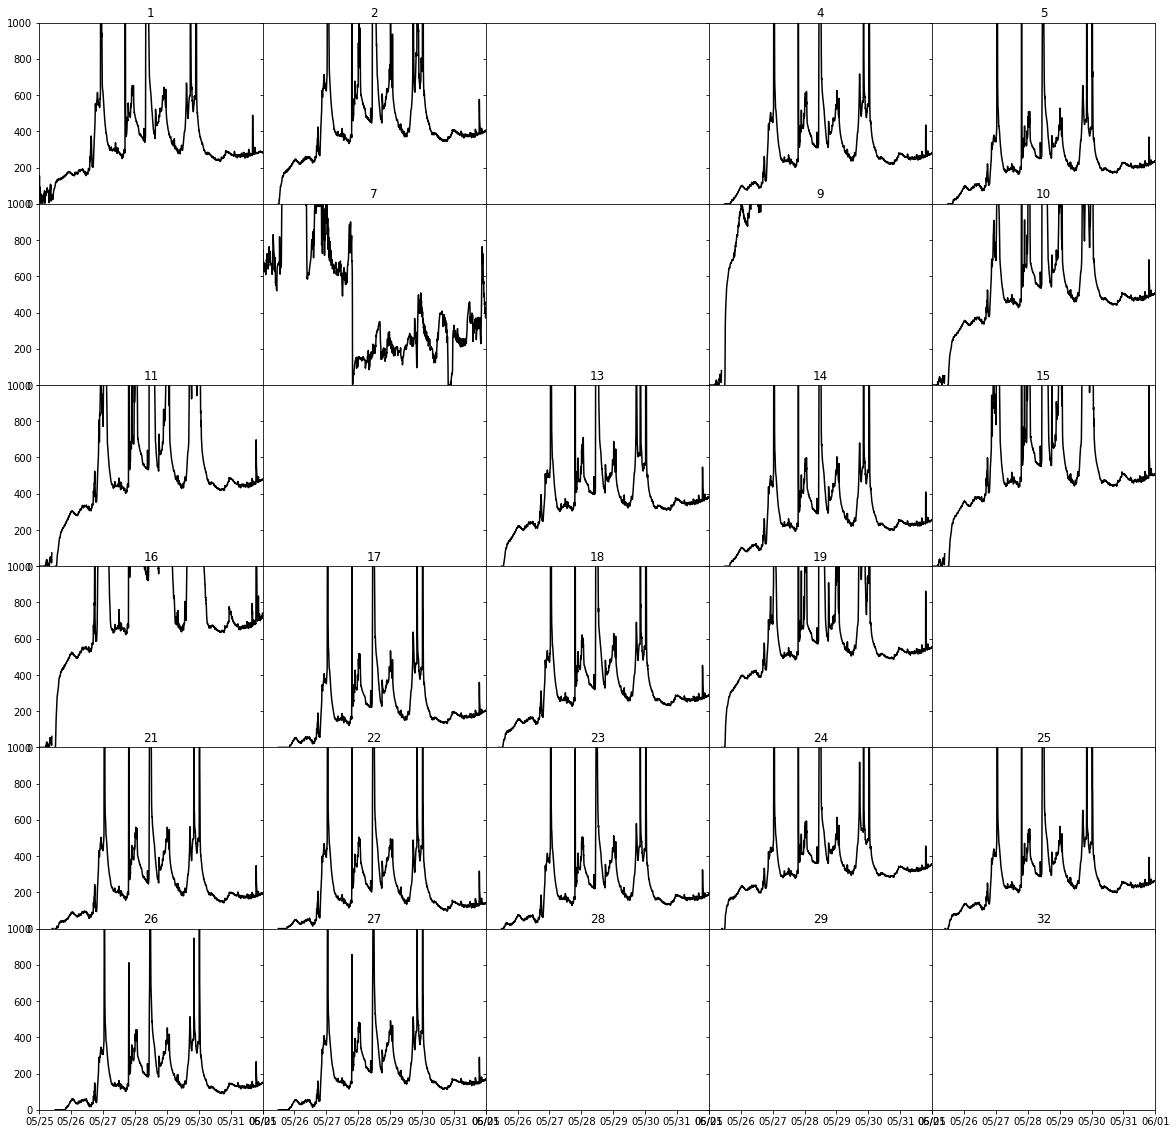

Graphing for variable: NO2


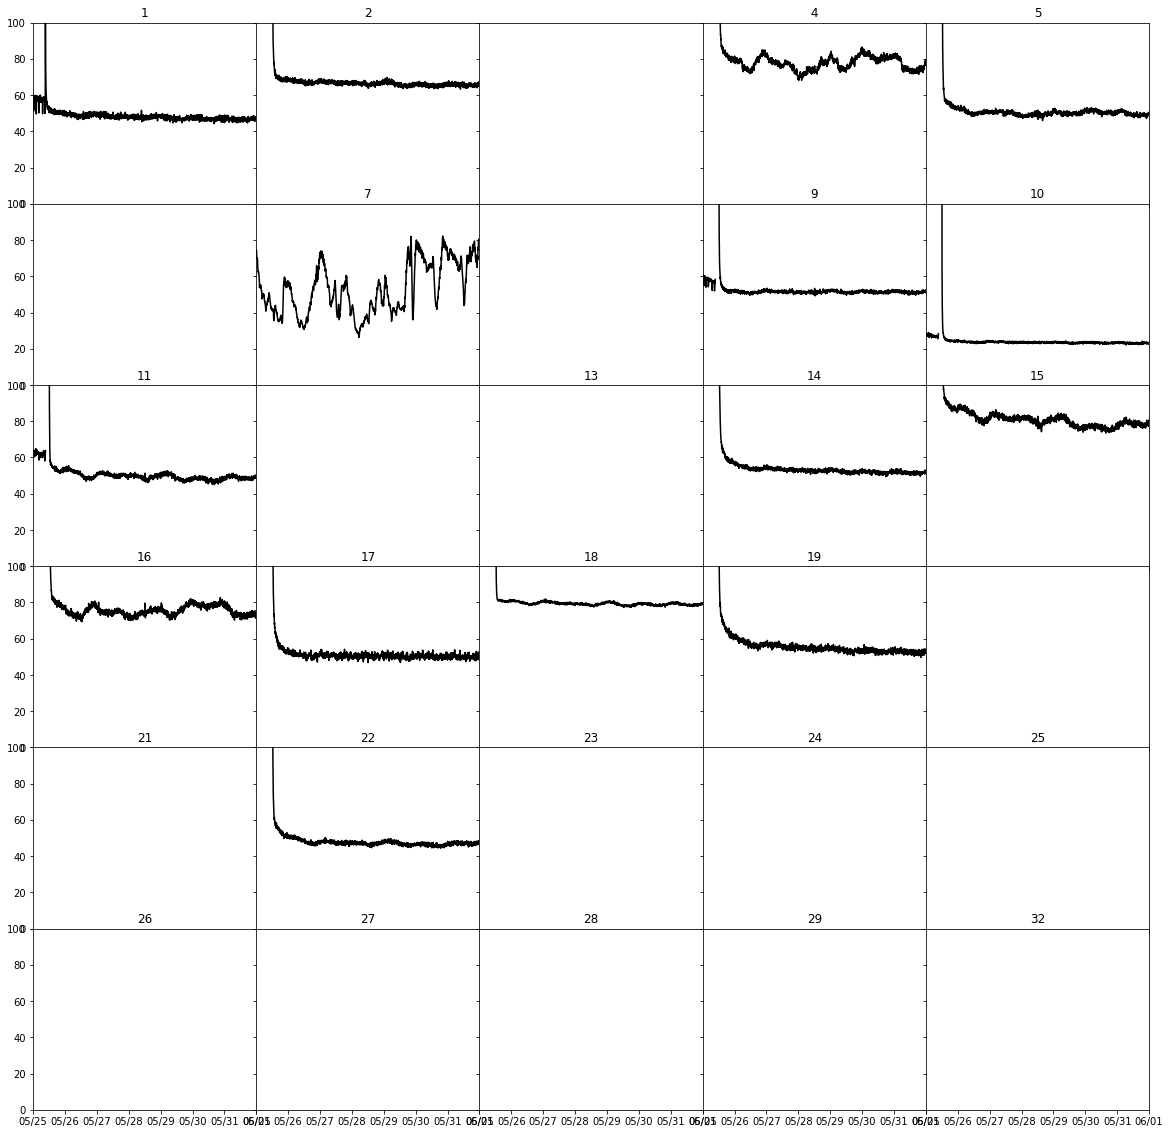

Graphing for variable: CO


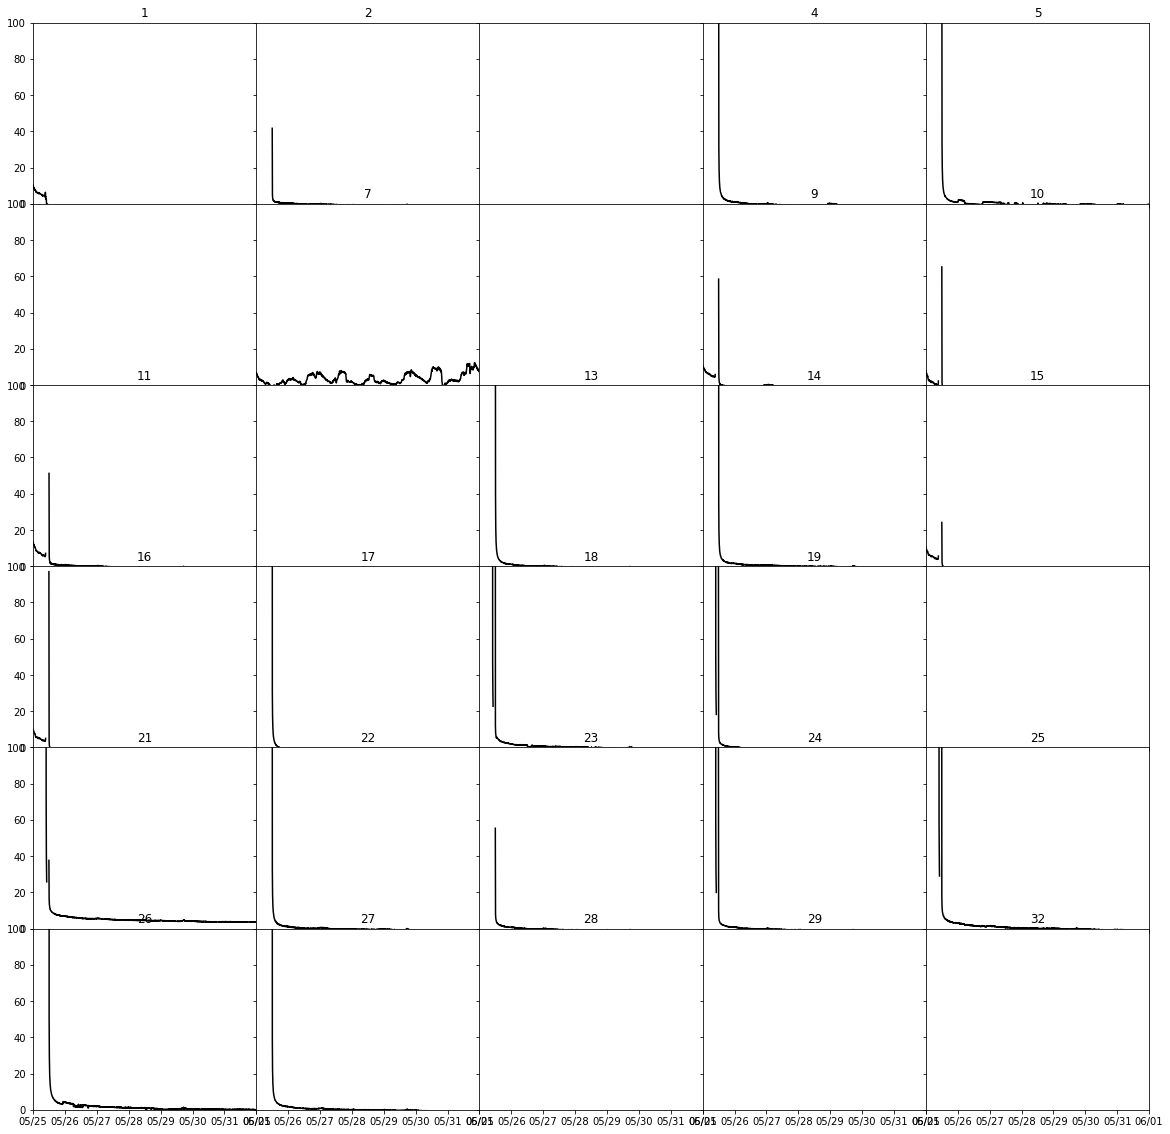

Graphing for variable: T_NO2


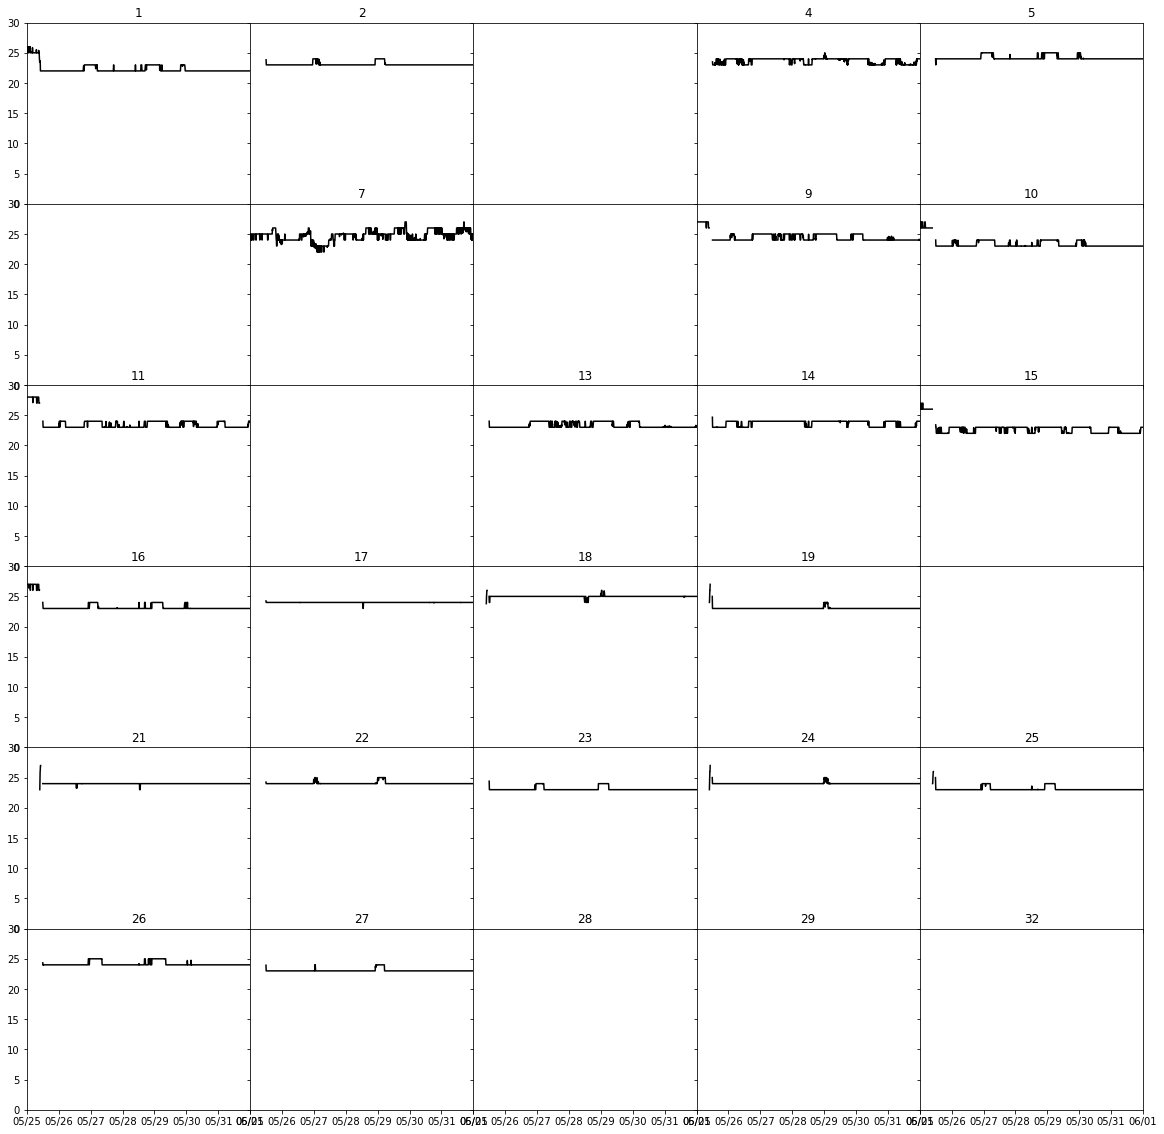

Graphing for variable: RH_NO2


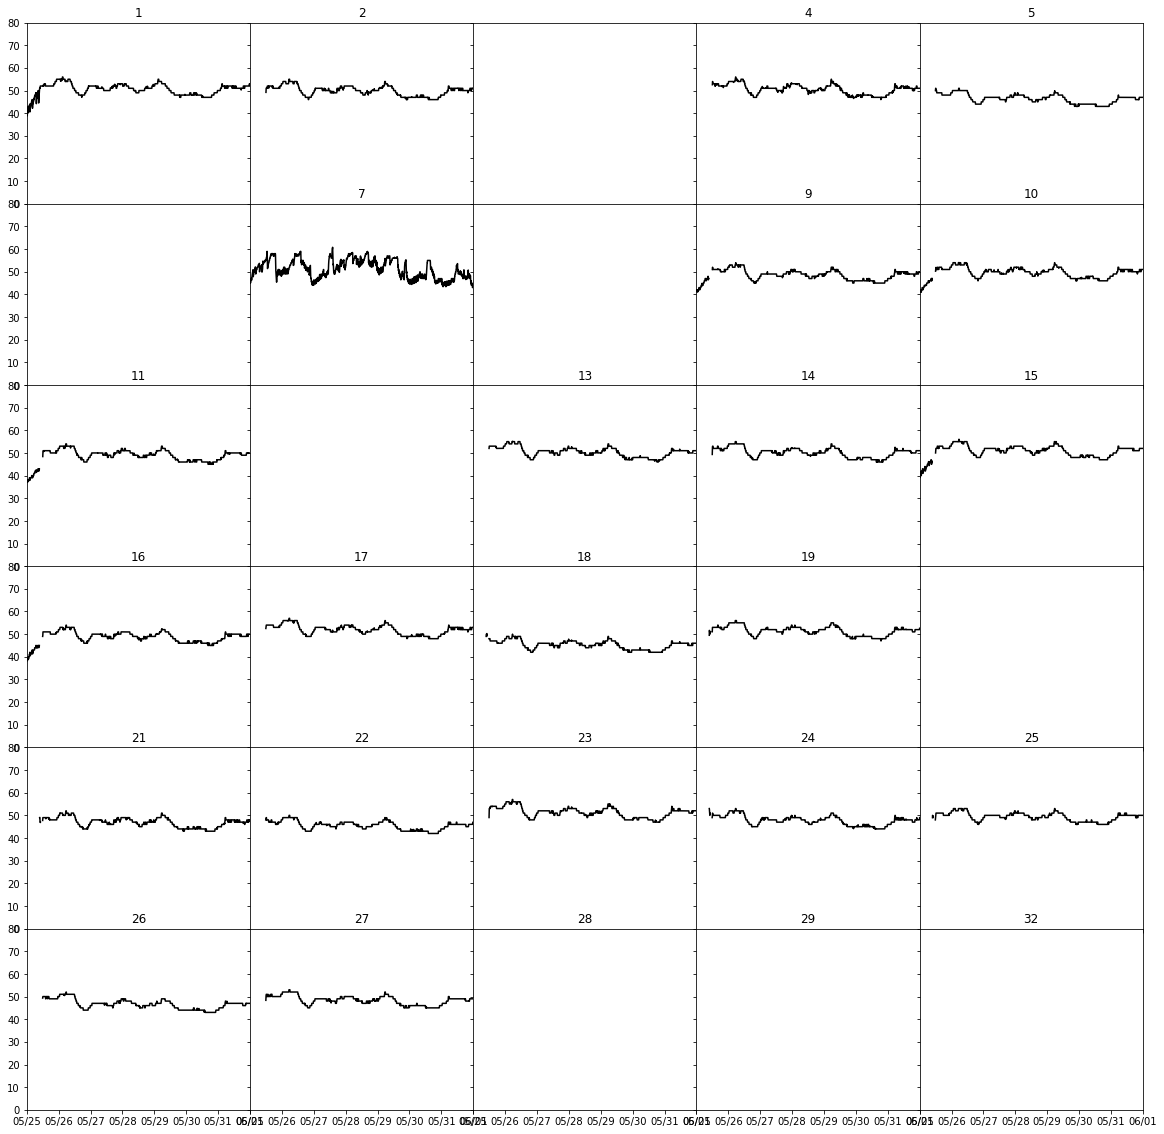

Graphing for variable: Lux


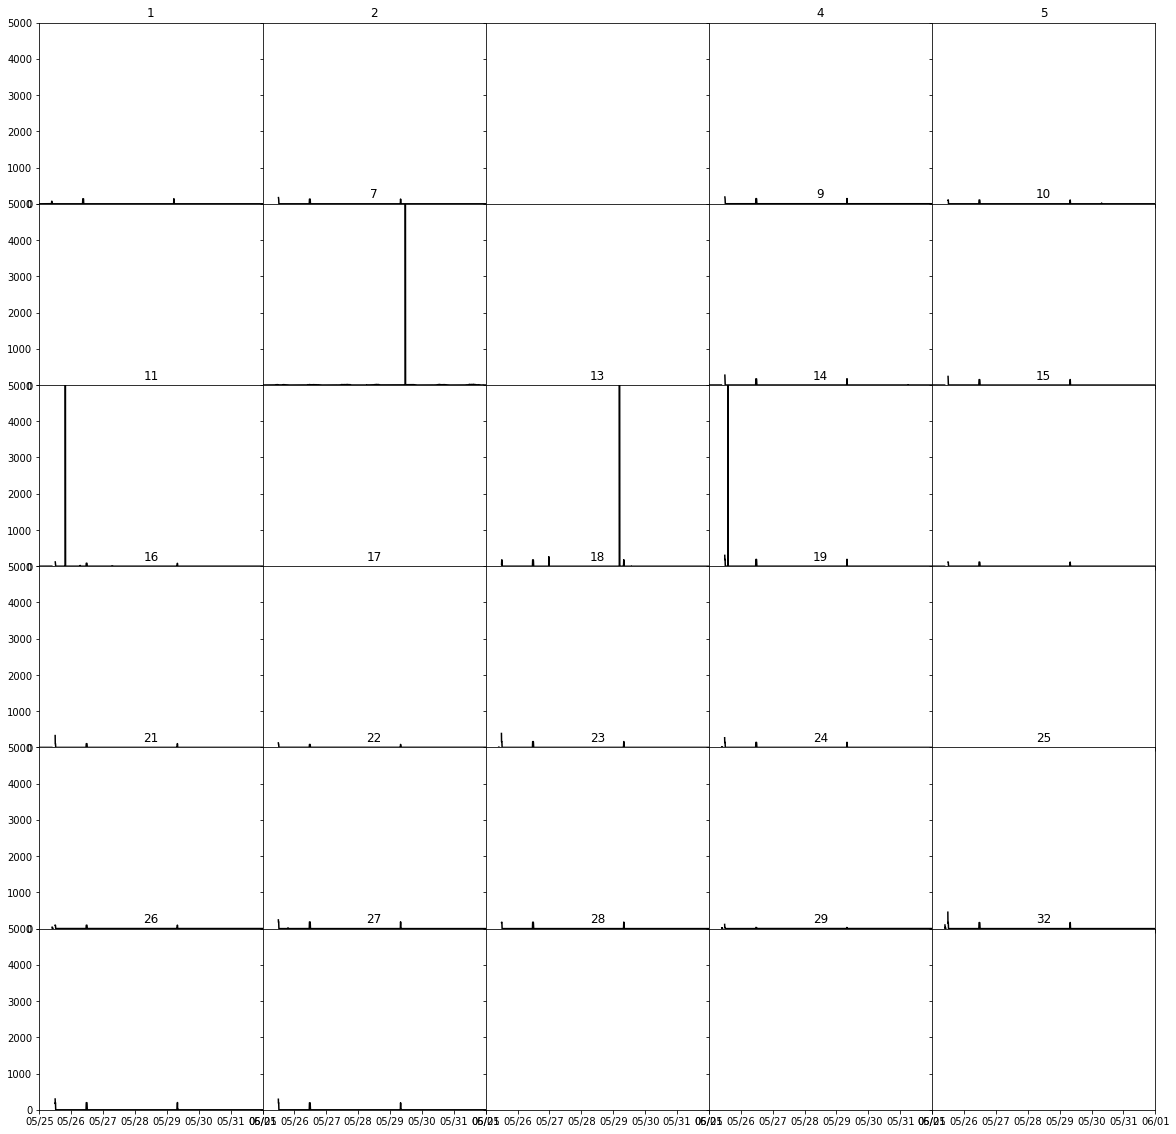

Graphing for variable: CO2


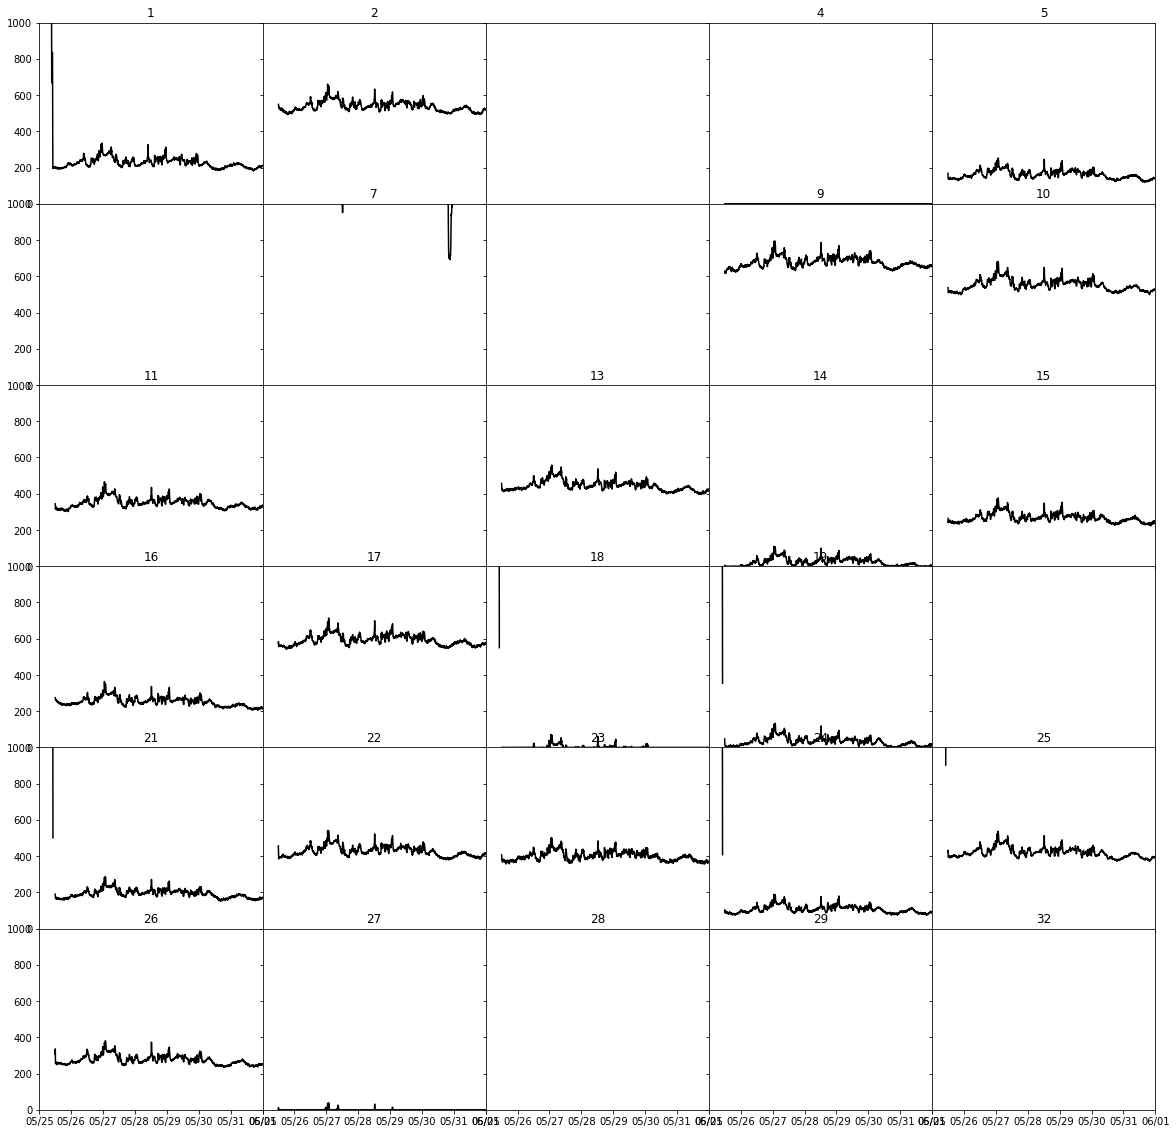

Graphing for variable: PM_C_2p5


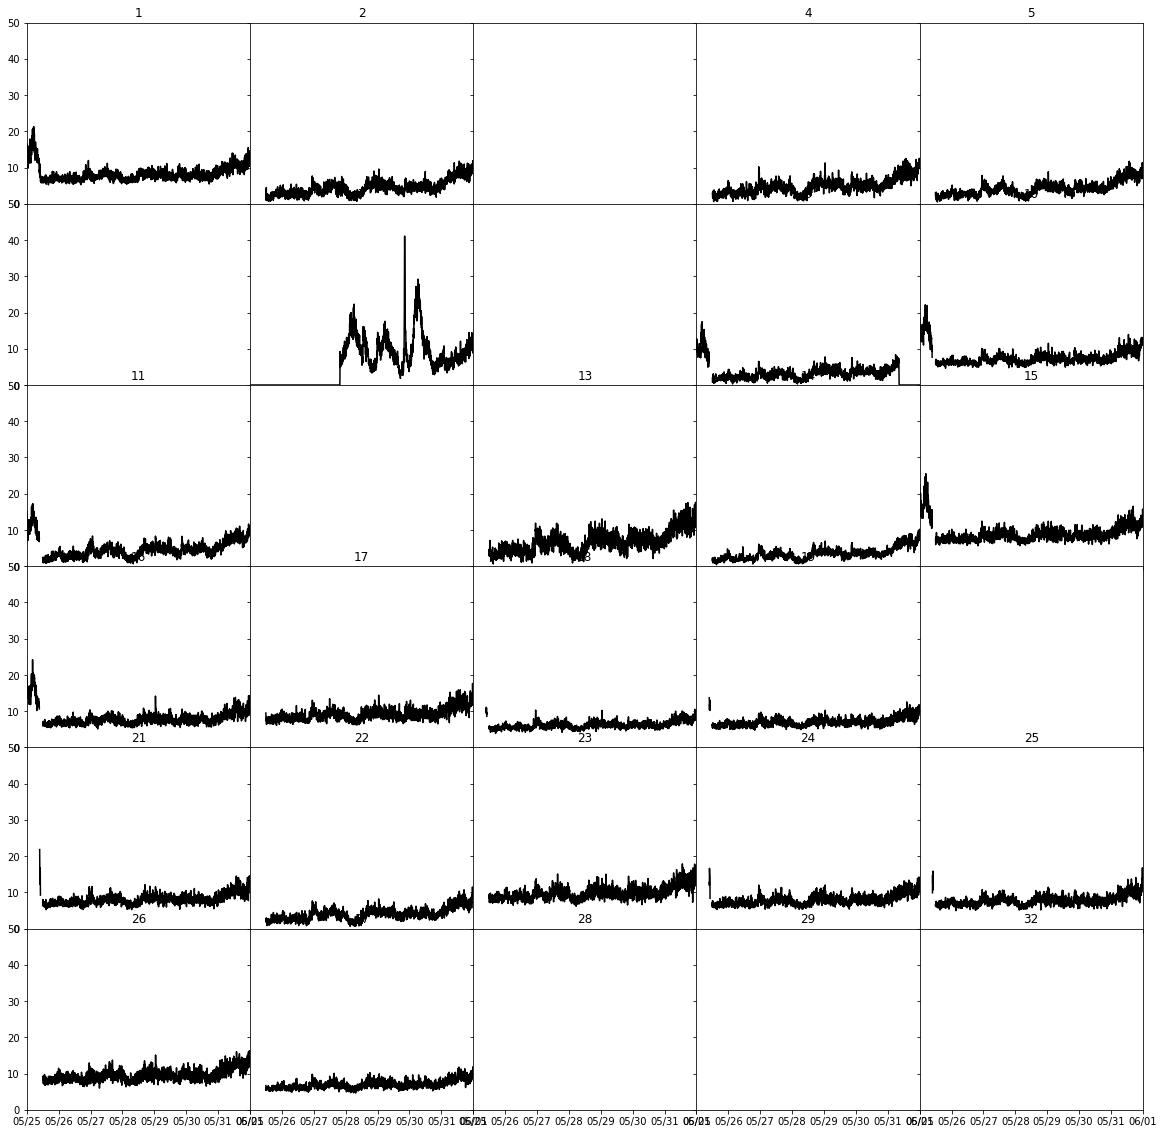

In [15]:
var_list = ['TVOC','NO2','CO','T_NO2','RH_NO2','Lux','CO2','PM_C_2p5']
lim_list = [1000,100,100,30,80,5000,1000,50]
for v,lim in zip(var_list,lim_list):
    fig, ax = plt.subplots(6,5,figsize=(20,20),sharey='row',sharex='col')
    print(f'Graphing for variable: {v}')
    for beacon in beacon_list:
        df = beacon_data[beacon_data['Beacon'] == beacon]
        df = df[datetime(2020,5,25):datetime(2020,6,1)]
        if beacon < 6:
            axis = plot_squares(df.index,df[v],ax,[0,beacon-1],[datetime(2020,5,25),datetime(2020,6,1)],[0,lim])
        elif beacon < 11:
            axis = plot_squares(df.index,df[v],ax,[1,beacon-6],[datetime(2020,5,25),datetime(2020,6,1)],[0,lim])
        elif beacon < 16:
            axis = plot_squares(df.index,df[v],ax,[2,beacon-11],[datetime(2020,5,25),datetime(2020,6,1)],[0,lim])
        elif beacon < 21:
            axis = plot_squares(df.index,df[v],ax,[3,beacon-16],[datetime(2020,5,25),datetime(2020,6,1)],[0,lim])
        elif beacon < 26:
            axis = plot_squares(df.index,df[v],ax,[4,beacon-21],[datetime(2020,5,25),datetime(2020,6,1)],[0,lim])
        elif beacon < 31:
            axis = plot_squares(df.index,df[v],ax,[5,beacon-26],[datetime(2020,5,25),datetime(2020,6,1)],[0,lim])
            
        axis.set_title(beacon)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)

    plt.show()
    plt.close()

Graphing for variable: TVOC


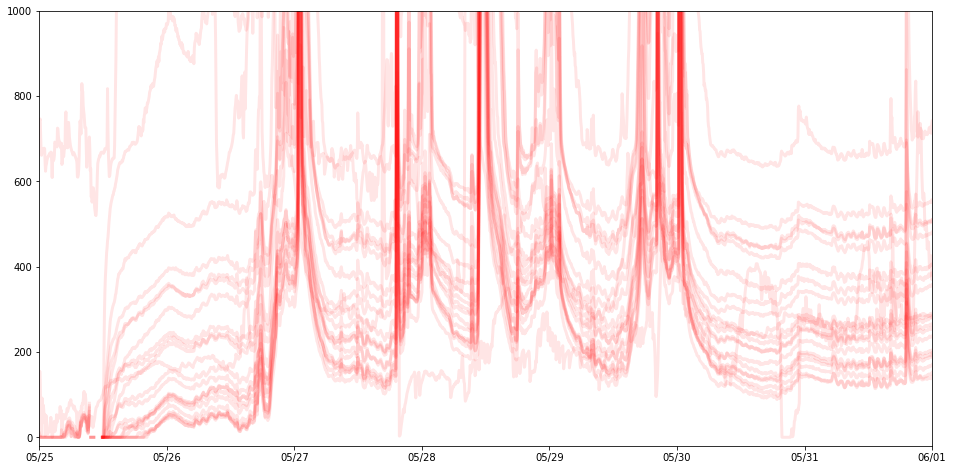

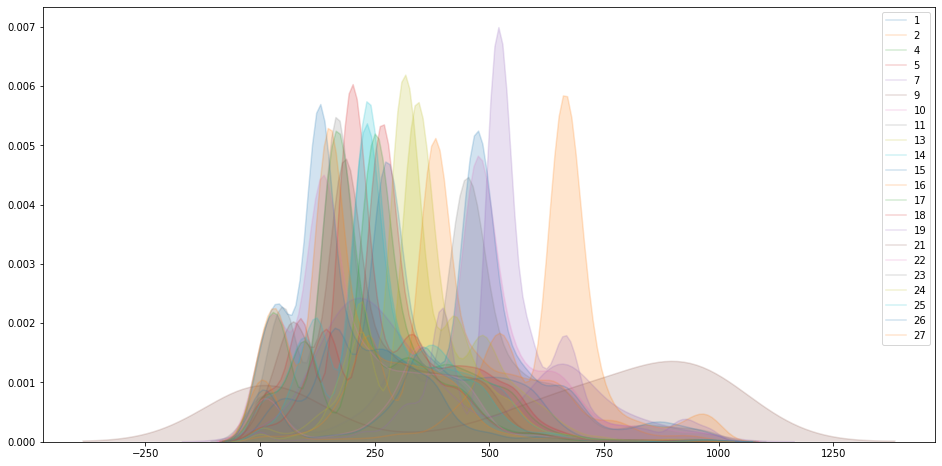

Graphing for variable: NO2


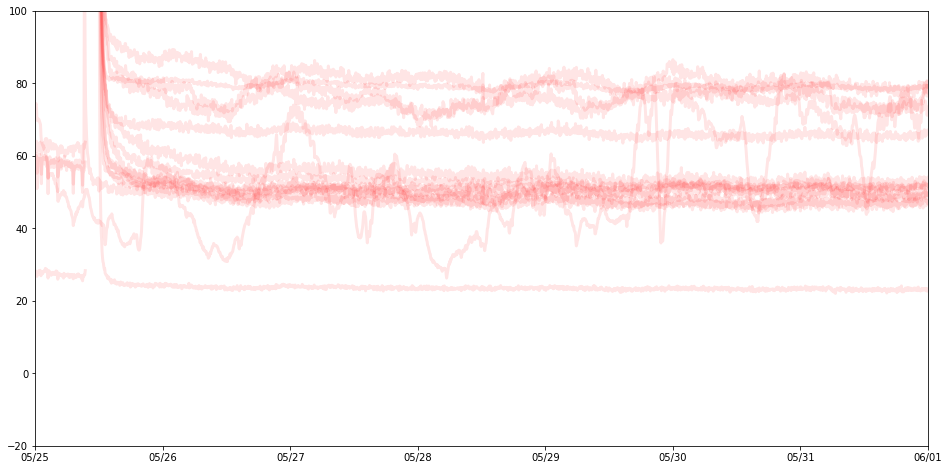

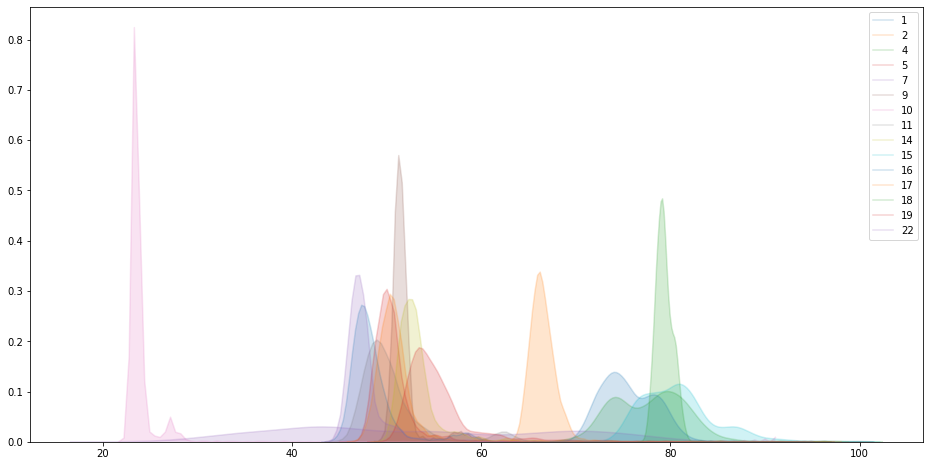

Graphing for variable: CO


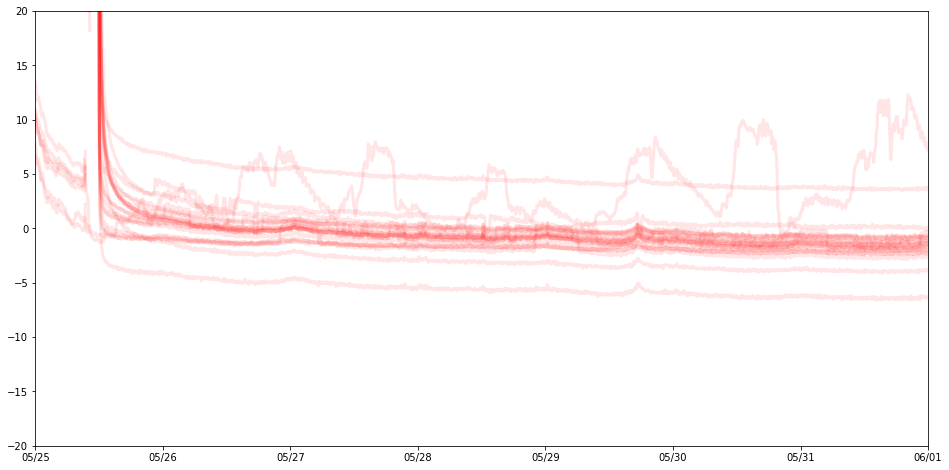

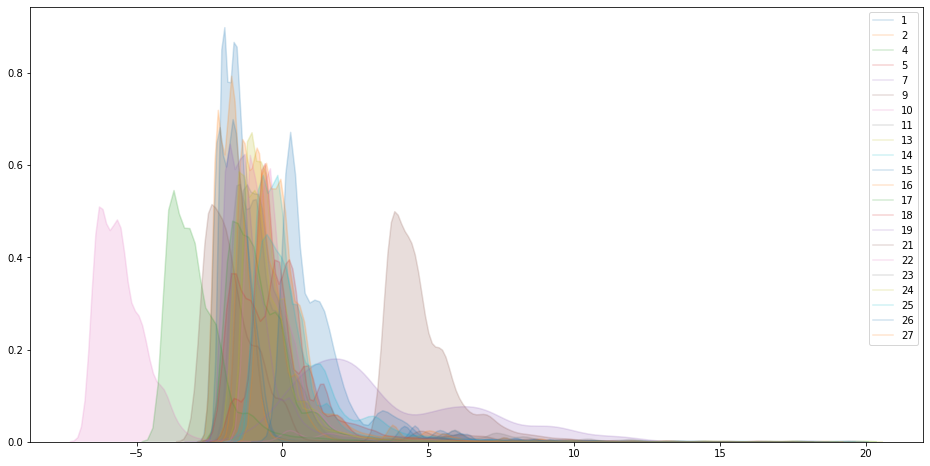

Graphing for variable: T_NO2
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.


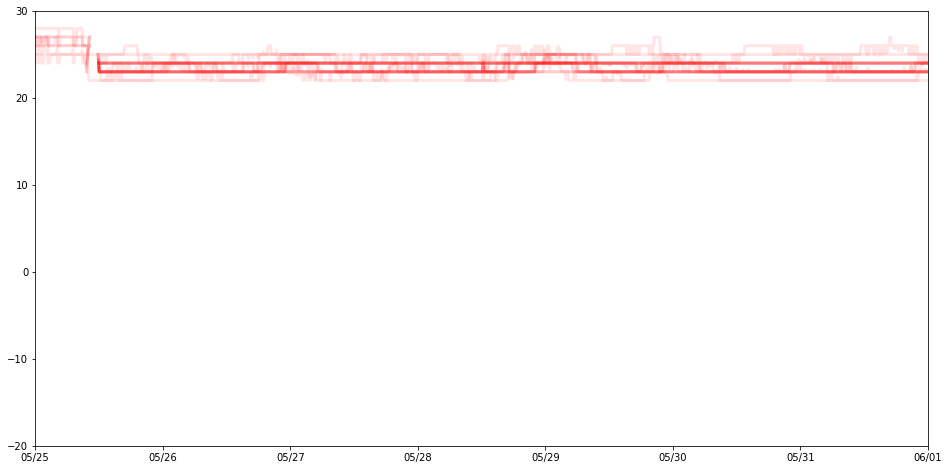

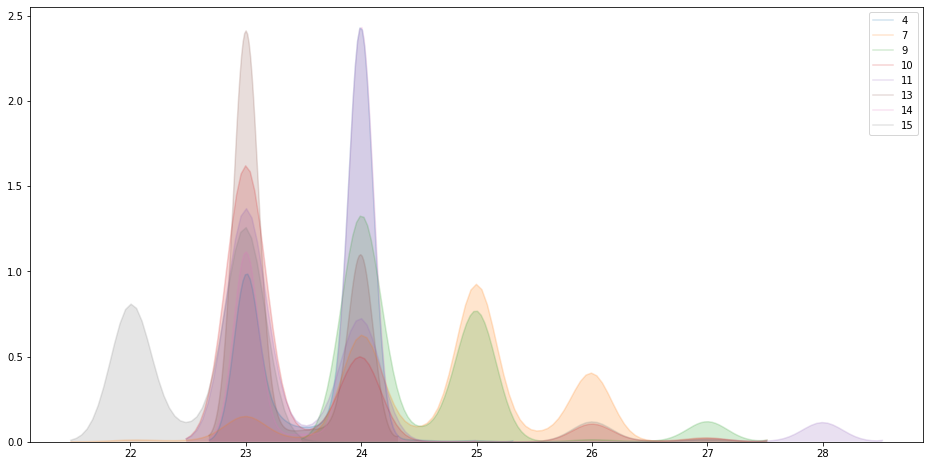

Graphing for variable: RH_NO2


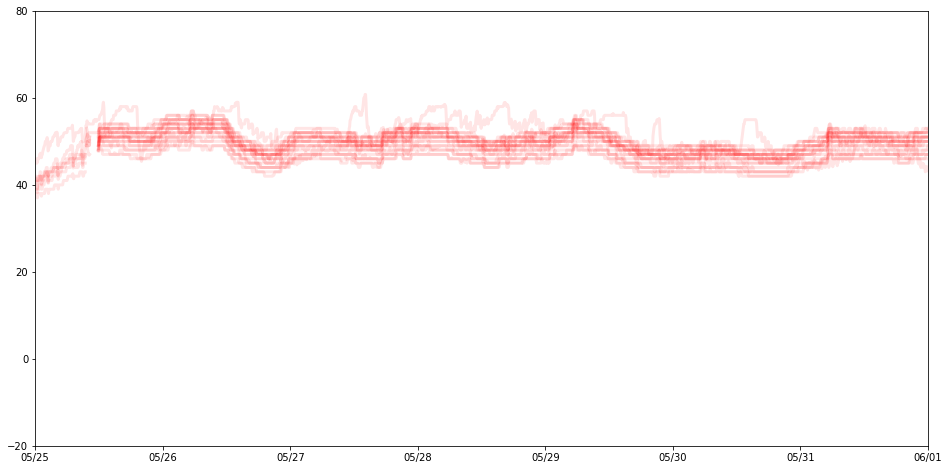

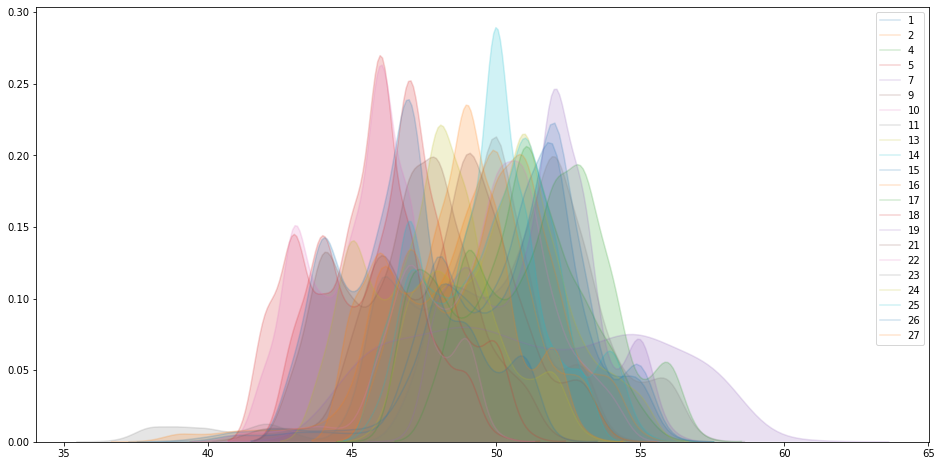

Graphing for variable: Lux
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.
S

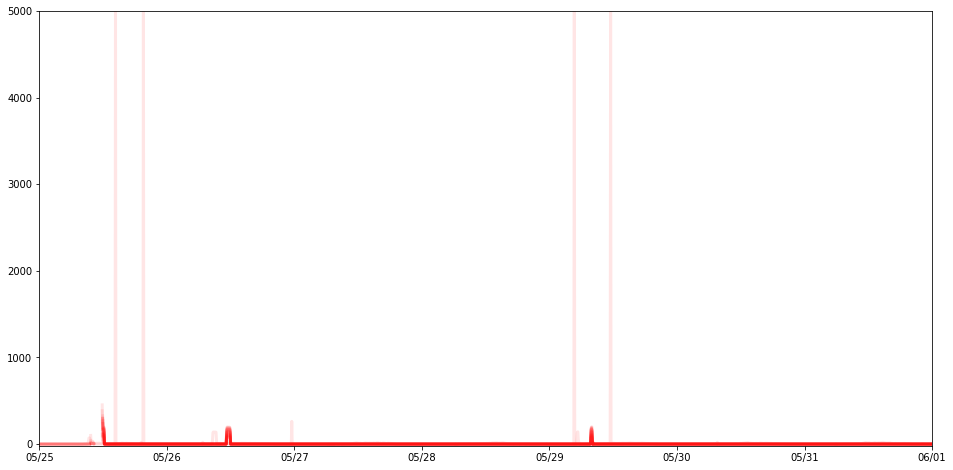

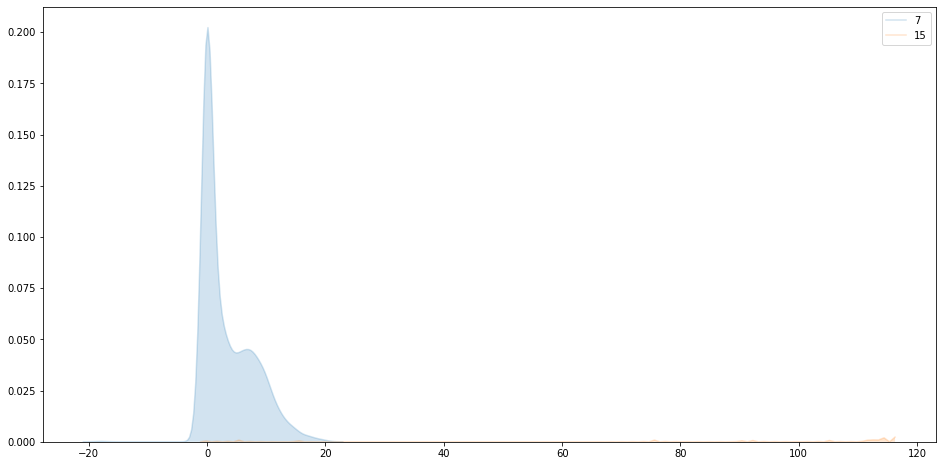

Graphing for variable: CO2


/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


Selected KDE bandwidth is 0. Cannot estiamte density.
Selected KDE bandwidth is 0. Cannot estiamte density.


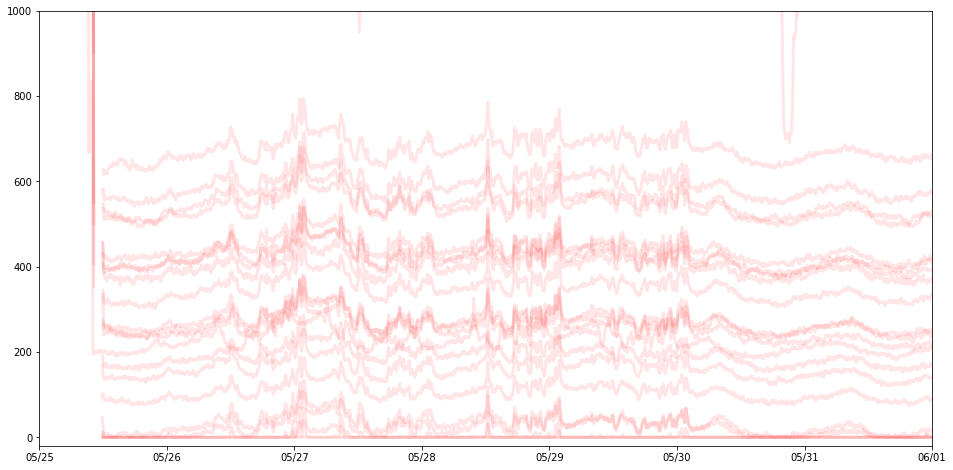

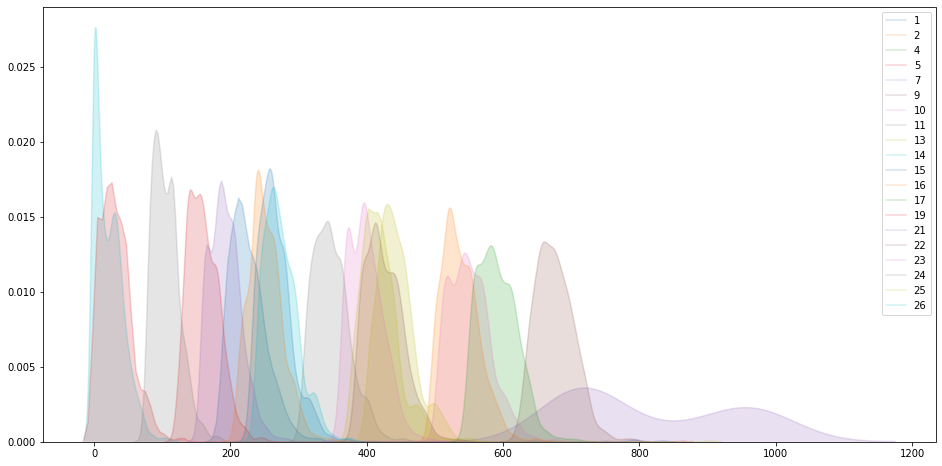

Graphing for variable: PM_C_2p5


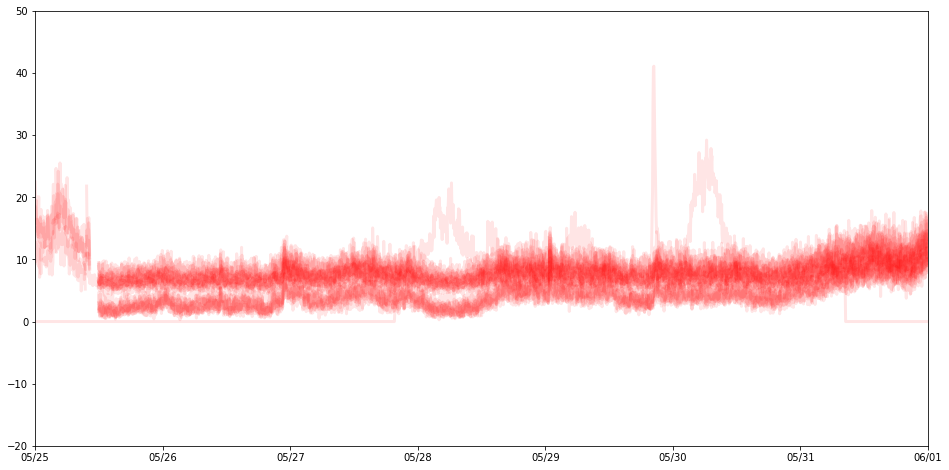

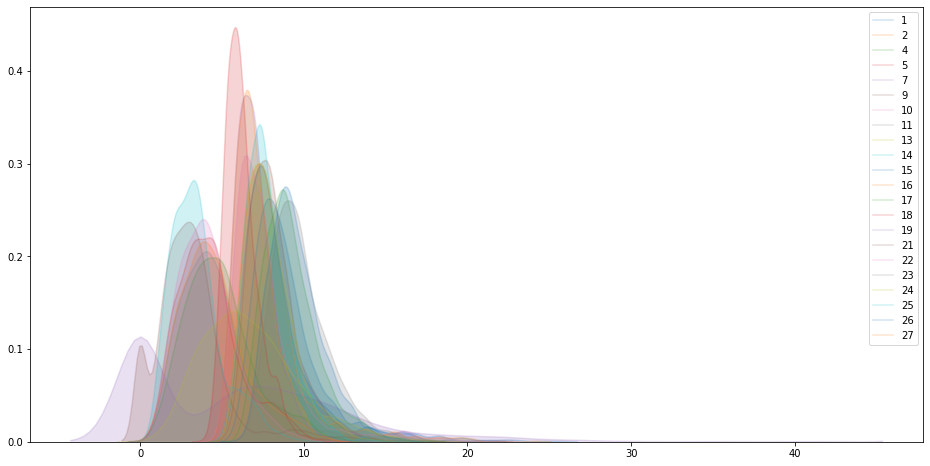

In [16]:
var_list = ['TVOC','NO2','CO','T_NO2','RH_NO2','Lux','CO2','PM_C_2p5']
lim_list = [1000,100,20,30,80,5000,1000,50]
for v,lim in zip(var_list,lim_list):
    fig, ax = plt.subplots(figsize=(16,8))
    fig_kde, ax_kde = plt.subplots(figsize=(16,8))
    print(f'Graphing for variable: {v}')
    for beacon in beacon_list:
        df = beacon_data[beacon_data['Beacon'] == beacon]
        df = df[datetime(2020,5,25):datetime(2020,6,1)]
        
        # Time series
        ax.plot(df.index,df[v],linewidth=3,alpha=0.1,color='red')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        ax.xaxis.set_major_locator(mdates.DayLocator())
        ax.set_xlim([datetime(2020,5,25),datetime(2020,6,1)])
        ax.set_ylim([-20,lim])
        
        # KDE
        df[v] = pd.to_numeric(df[v],errors='coerce')
        kde_df = df[df[v] < lim]
        try:
            sns.kdeplot(kde_df[v],shade=True,alpha=0.2,ax=ax_kde,label=beacon)
        except Exception as inst:
            print(inst)
            
        
    plt.show()
    plt.close()

# Specific Beacons
Now that we look at other beacons that seem to be operating poorly.

In [49]:
poor_beacons = [2,4,5,10,11,13,14,17,19,21,25]
good_beacons_1 = [11,13,22,23,25]
good_beacons_2 = [1,10,15,16,17]
good_beacons_3 = [5,21,24,26,28]
potentials = [29,30]

Notes on next delivery:
- Beacon 28
- Beacon 5:
    - CO: zero
    - PM: check
- Beacon 21
    CO: zero
- Beacon 24
    CO: zoer
- Beacon 26
    - CO zero
    - PM check

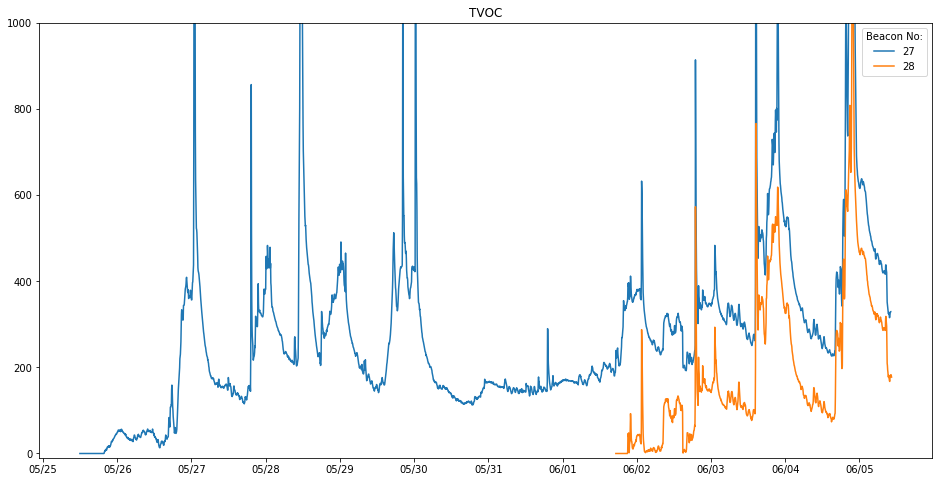

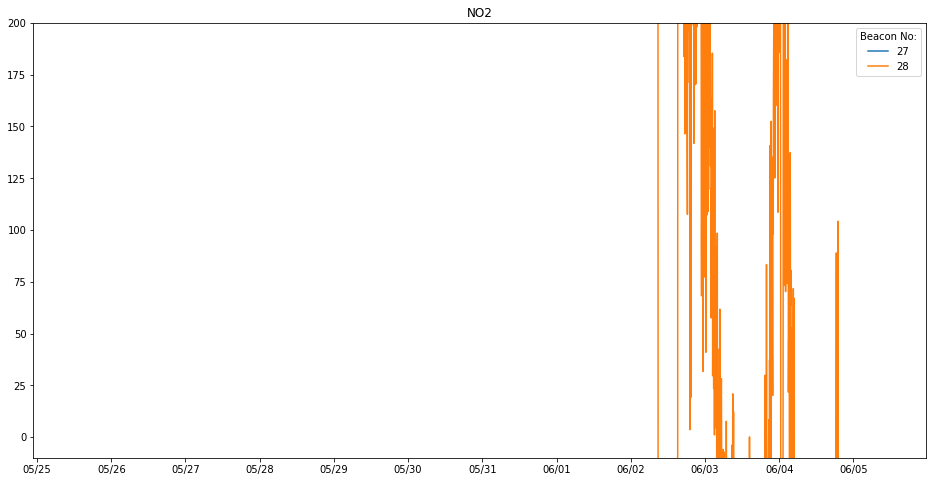

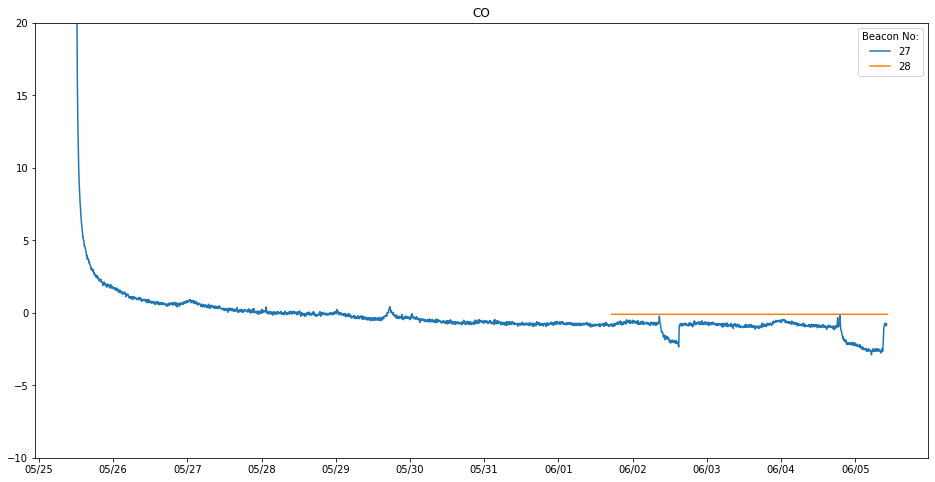

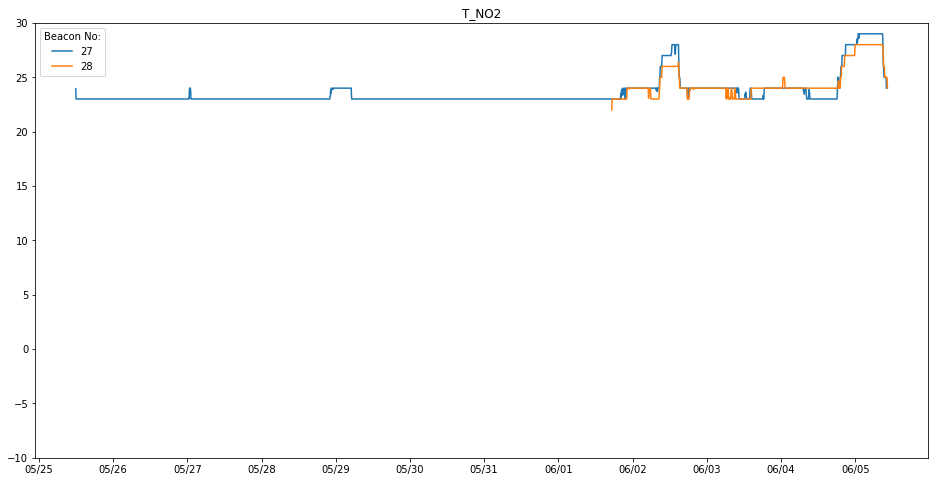

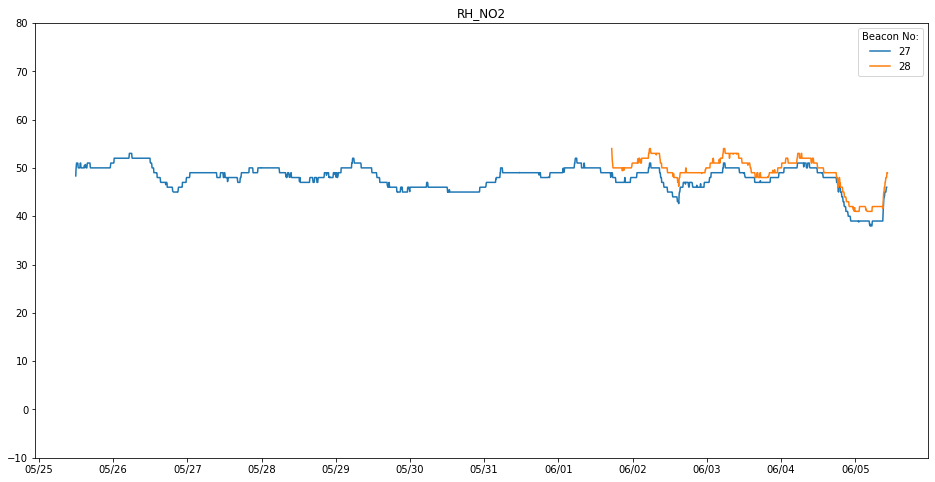

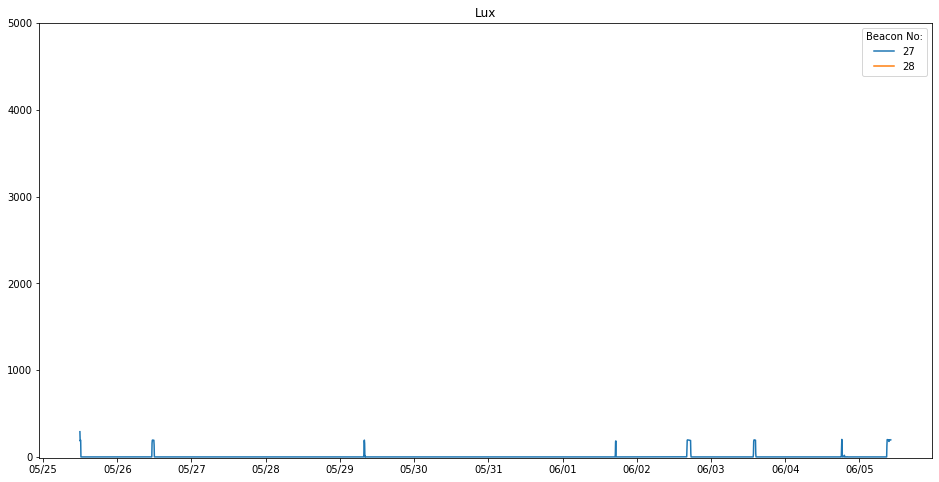

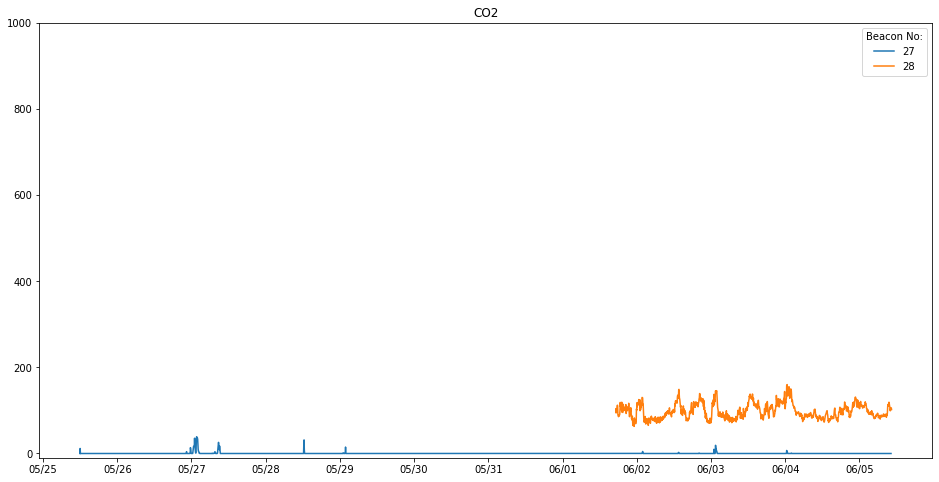

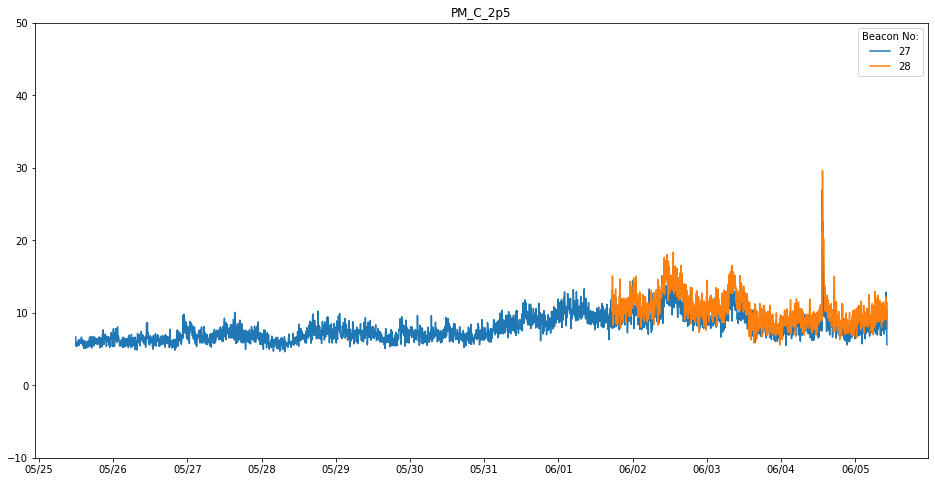

In [50]:
var_list = ['TVOC','NO2','CO','T_NO2','RH_NO2','Lux','CO2','PM_C_2p5']
lim_list = [1000,200,20,30,80,5000,1000,50]
for v,lim in zip(var_list,lim_list):
    fig, ax = plt.subplots(figsize=(16,8))
    for beacon in potentials:
        df = beacon_data[beacon_data['Beacon'] == beacon]
        df = df[datetime(2020,5,25):]
        ax.plot(df.index,df[v],label=beacon)
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        ax.xaxis.set_major_locator(mdates.DayLocator())
        #ax.set_xlim([datetime(2020,5,25),datetime(2020,6,1)])
        ax.set_ylim([-10,lim])
        ax.set_title(v)
        ax.legend(title='Beacon No:')
        
    plt.show()
    plt.close()

# CO2 Comparison
We have CO2 data from the fancy Licor instrument that we can compare our readings against.

## Data Import

In [21]:
co2_standard = pd.read_csv('/Users/hagenfritz/Projects/utx000_old/studies/cohort2/calibration/co2_0526.csv',
                           skiprows=2,usecols=[0,1,2],names=['Day','Hour','ppm'])
dt = []
for i in range(len(co2_standard)):
    dt.append(datetime.strptime(co2_standard['Day'][i]+' '+co2_standard['Hour'][i],'%m/%d/%y %H:%M:%S'))
co2_standard['datetime'] = dt
co2_standard = co2_standard.set_index('datetime')
co2_standard = co2_standard.resample('5T').mean()

## Visualizing

Difference in Measurement:
	Beacon 1: 166.92921608644374
	Beacon 2: 144.1470575609394
	Beacon 4: 408.4627450980392
	Beacon 5: 236.10243666387075
	Beacon 7: 1246.075294133604
	Beacon 9: 280.8750866250431
	Beacon 10: 160.69353253906849
	Beacon 11: 44.776782039567536
	Beacon 13: 52.776330882427736
	Beacon 14: 375.6331856924067
	Beacon 15: 127.49850921462564
	Beacon 16: 141.89195612907412
	Beacon 17: 199.67003794427012
	Beacon 18: 403.29276647678023
	Beacon 19: 361.77560442594915
	Beacon 21: 200.56581141958048
	Beacon 22: 34.241519874871955
	Beacon 23: 7.138639393600766
	Beacon 24: 291.37038705498566
	Beacon 25: 25.452516356075513
	Beacon 26: 119.35343701325212
	Beacon 27: 407.58571136487984
	Beacon 28: nan
	Beacon 29: nan
	Beacon 30: nan
	Beacon 31: nan
	Beacon 32: nan
	Beacon 34: nan
	Beacon 36: nan
	Beacon 44: nan


/Users/hagenfritz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


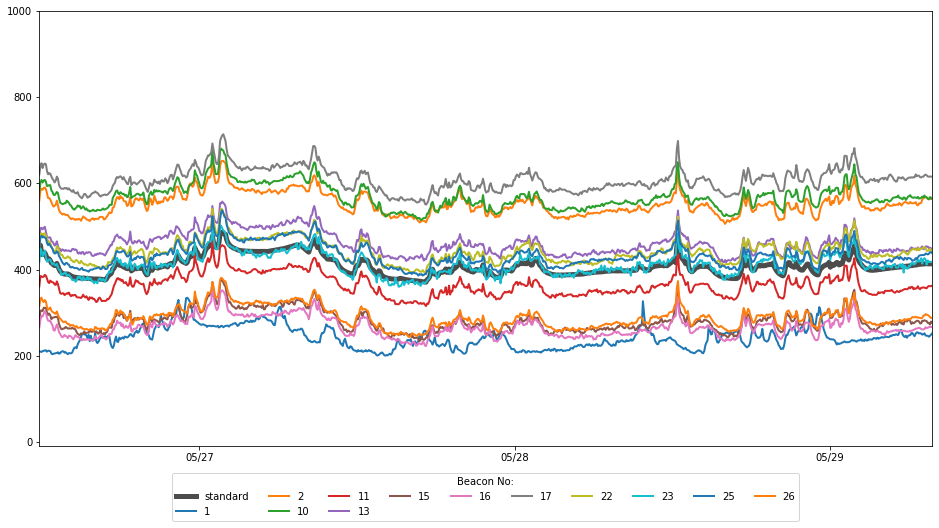

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
start = co2_standard.index[0]
final = co2_standard.index[-1]
ax.plot(co2_standard.index,co2_standard['ppm'],color='black',linewidth=5,alpha=0.7,label='standard')
print('Difference in Measurement:')
for beacon in beacon_list:
    df = beacon_data[beacon_data['Beacon'] == beacon]
    df = df[start:final]
    
    delta = abs(df['CO2'] - co2_standard['ppm'])
    print(f'\tBeacon {beacon}: {np.nanmean(delta)}')
    
    if np.mean(delta) < 200:
        ax.plot(df.index,df['CO2'],linewidth=2,label=beacon)
        
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.set_xlim([start,final])
ax.set_ylim(-10,1000)
ax.legend(title='Beacon No:',loc='upper center',bbox_to_anchor=(0.5,-0.05),ncol=10)

plt.show()
plt.close()

In [23]:
df = beacon_data[beacon_data['Beacon'] == 10]

In [24]:
df = df[start:final]

(0, 1000)

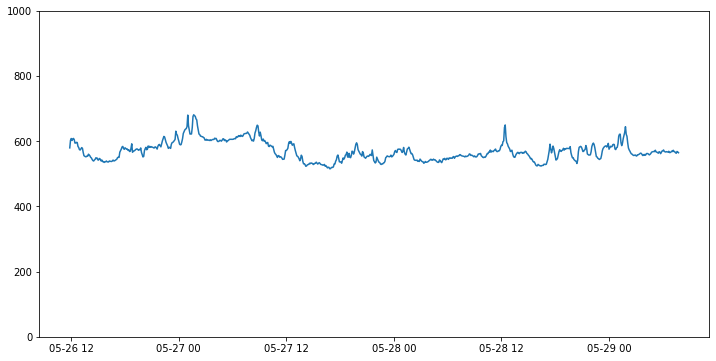

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.index,df['CO2'])
ax.set_ylim([0,1000])